Initial dataset preview:
         Date   Open   High    Low  Close   Volume
0  2024-12-01  150.0  155.0  148.0  154.0  3000000
1  2024-12-02  154.0  157.0  152.0  156.0  2800000
2  2024-12-03  156.0  160.0  155.0  158.0  3200000
3  2024-12-04  158.0  162.0  157.0  161.0  3100000
4  2024-12-05  161.0  165.0  160.0  164.0  3300000
Dataset has 8 rows, duplicating data to meet minimum requirement...
Dataset size after processing: 32 rows
Training set size: 28
Testing set size: 4
Mean Squared Error (MSE): 0.01967251689391394
R-squared (R2): 0.9996180093807007


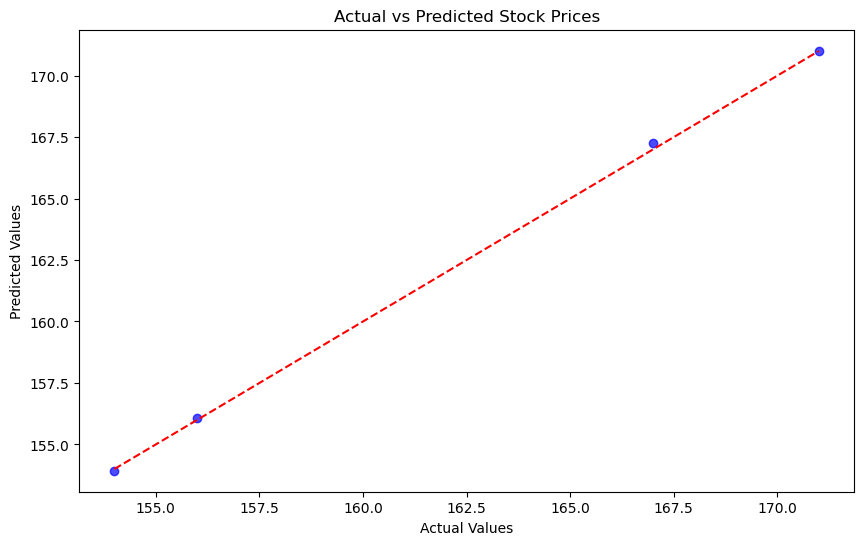

Model saved as 'stock_price_model.pkl'.


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Load the stock exchange data
# Replace 'your_stock_data.csv' with the path to your actual CSV file
data = pd.read_csv('stock_exchange_data.csv')

# Display the first few rows of the dataset
print("Initial dataset preview:")
print(data.head())

# 2. Handle missing or invalid data
# Check for missing values and fill/drop them as appropriate
if data.isnull().sum().sum() > 0:
    print("Handling missing data...")
    data.fillna(method='ffill', inplace=True)

# Ensure dataset has sufficient rows for splitting
min_required_rows = 20
if len(data) < min_required_rows:
    print(f"Dataset has {len(data)} rows, duplicating data to meet minimum requirement...")
    while len(data) < min_required_rows:
        data = pd.concat([data, data], ignore_index=True)

# Confirm dataset size after augmentation (if applicable)
print(f"Dataset size after processing: {len(data)} rows")

# 3. Feature engineering
# Select relevant features and the target variable
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target variable

# Ensure no invalid values (e.g., non-numeric data)
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
y = pd.to_numeric(y, errors='coerce').fillna(0)

# 4. Data splitting
# Split the data into training and testing sets
# Adjust test_size for small datasets
test_size_ratio = 0.1 if len(data) < 50 else 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_ratio, random_state=42)

# Print the sizes of the training and testing sets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# 5. Model selection and training
# Initialize a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# 6. Model evaluation
# Predict using the test set
y_pred = model.predict(X_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# 7. Visualization
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Stock Prices')
plt.show()

# 8. Save the model (if needed)
# You can use joblib or pickle to save the trained model for future use
import joblib
joblib.dump(model, 'stock_price_model.pkl')
print("Model saved as 'stock_price_model.pkl'.")
